In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies.csv', encoding='gbk')

In [3]:
movies.head()

,comments,during_time,language,location,rate,star,title,types
0,4497,117.0,日语,日本,7.8,40,命运之夜——天之杯II ：迷失之蝶,"剧情,动画,奇幻"
1,11477,86.0,英语,美国,7.2,35,爱宠大机密2,"喜剧,动画,冒险"
2,201628,98.0,"汉语普通话 , 英语",中国大陆,6.9,35,飞驰人生,喜剧
3,39640,100.0,英语,美国,8.8,45,玩具总动员4,"喜剧,动画,奇幻"
4,138484,99.0,汉语普通话,"中国大陆 , 美国",7.9,40,白蛇：缘起,"爱情,动画,奇幻"


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 8 columns):
comments       1579 non-null int64
during_time    947 non-null float64
language       1229 non-null object
location       1286 non-null object
rate           532 non-null float64
star           1579 non-null int64
title          1579 non-null object
types          1177 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 98.8+ KB


In [5]:
plt.style.use('ggplot')

In [6]:
plt.rcParams['font.family'] = ['SimHei']

In [7]:
af = movies.iloc[movies['comments'].sort_values(ascending=False)[:30].index]

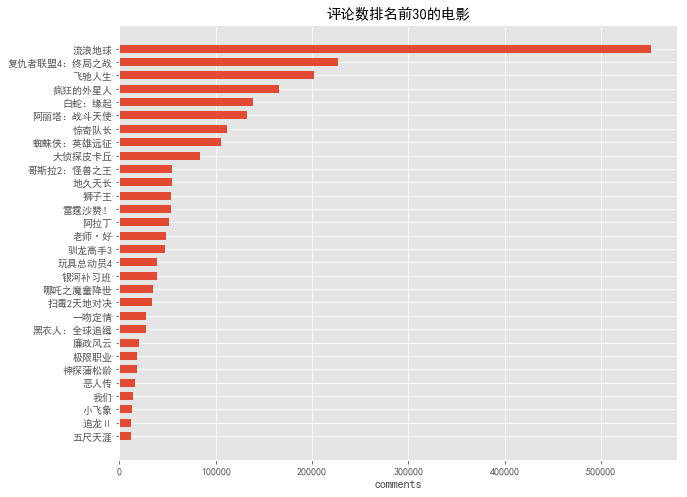

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

y_pos = np.arange(0,60, 2)
performance = af['comments']

ax.barh(y_pos, performance, align='center', height=1.2)
ax.set_yticks(y_pos)
ax.set_yticklabels(af['title'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('comments')
ax.set_title('评论数排名前30的电影')

plt.show()
fig.savefig('comments.png', transparent=False, dpi=80, bbox_inches="tight")

e:\工具\python\python36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
e:\工具\python\python36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


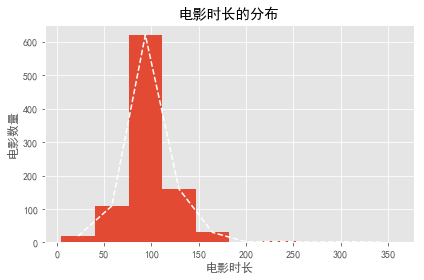

In [9]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(movies['during_time'])
ax.plot((bins + 35.5/2)[:-1], n, 'w--')
ax.set_xlabel('电影时长')
ax.set_ylabel('电影数量')
ax.set_title('电影时长的分布')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()
fig.savefig('during_time.png', transparent=False, dpi=80, bbox_inches="tight")

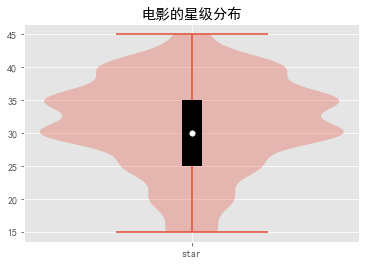

In [10]:
fig, ax = plt.subplots()
data = movies['star'][ movies['star']!=0]
ax.set_xticks([1])
ax.set_xticklabels(['star'])
ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=True)
ax.vlines(1,25, movies['star'][ movies['star']!=0].describe()['75%'], color='k', linestyle='-', lw=20)
ax.scatter(1, movies['star'][ movies['star']!=0].describe()['50%'], marker='o', color='white', s=30, zorder=3)
ax.set_title('电影的星级分布')
plt.show()
fig.savefig('star.png', transparent=False, dpi=80, bbox_inches="tight")

In [11]:
from collections import Counter

In [12]:
cf = movies['location'].astype('str').apply(lambda x: x.split(',') if x is not None else [])
movies['location'] = cf.apply(lambda x: x[0].strip())

In [13]:
colors= plt.get_cmap('gist_ncar')(np.linspace(0.15, 0.85, 35))

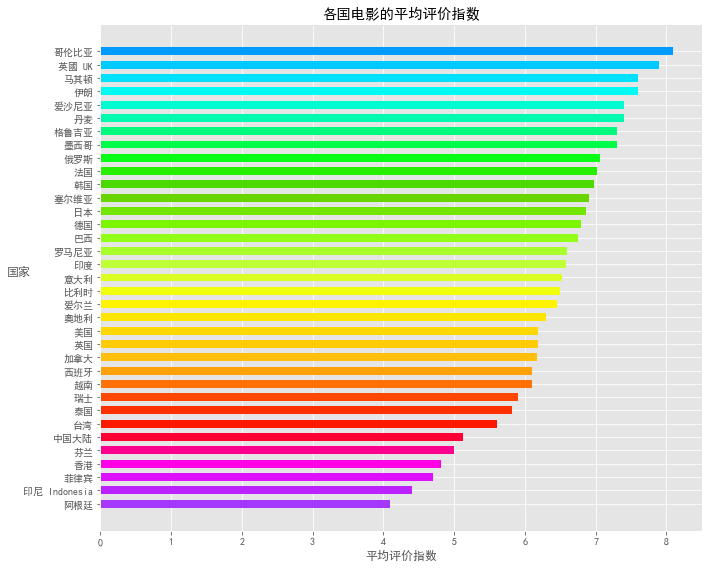

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
y = np.arange(0,70,2)
ylabels = movies.groupby('location')['rate'].mean().dropna()[1:].sort_values(ascending=False).index
rate = movies.groupby('location')['rate'].mean().dropna()[1:].sort_values(ascending=False).values
ax.barh(y,rate, align='center', height=1.2, color=colors)
ax.set_yticks(y)
ax.set_yticklabels(ylabels)
ax.set_xlabel('平均评价指数')
ax.set_ylabel('国家', rotation=0)
ax.set_title('各国电影的平均评价指数')
ax.invert_yaxis()
plt.tight_layout()
plt.show()
fig.savefig('location_VS_rate.png', transparent=False, dpi=80, bbox_inches="tight")